In [105]:
import yaml
 
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")

In [106]:
        config

{'input_data': {'file': '../data/raw/alzheimers_disease_data.csv'},
 'output_data': {'file': ''}}

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv(config['input_data']['file'])
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [93]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [94]:
df.shape

(2149, 35)

In [95]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [96]:
df_drop = df.drop(columns=["PatientID", "DoctorInCharge"])
df_drop

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [97]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
potential_categorical_from_numerical = df_drop.select_dtypes("number").loc[:, df_drop.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,3,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2145,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2146,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2147,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [98]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df_drop.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_categorical

,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,3,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2145,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2146,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2147,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [99]:
# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df_drop.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
df_numerical

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
0,73,22.927749,13.297218,6.327112,1.347214,9.025679,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883
1,89,26.827681,4.542524,7.619885,0.518767,7.151293,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424
2,73,17.795882,19.555085,7.844988,1.826335,9.673574,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548
3,74,33.800817,12.209266,8.428001,7.435604,8.392554,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226
4,89,20.716974,18.454356,6.310461,0.795498,5.597238,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,39.121757,1.561126,4.049964,6.555306,7.535540,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,4.492838
2145,75,17.857903,18.767261,1.360667,2.904662,8.555256,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,9.204952
2146,77,15.476479,4.594670,9.886002,8.120025,5.769464,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,5.036334
2147,78,15.299911,8.674505,6.354282,1.263427,8.322874,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,3.785399


# Categorical Analysis - Frequency Count

In [100]:
# Generating a crosstab for 'gender' and 'Diagnosis'
crosstab_gender = pd.crosstab(df_drop['Gender'], df_drop['Diagnosis'])
crosstab_gender

Diagnosis,0,1
Gender,,
0,675,386
1,714,374


In [101]:
# Generating a crosstab for 'Ethnicity' and 'Diagnosis'
crosstab_ethnicity = pd.crosstab(df_drop['Ethnicity'], df_drop['Diagnosis'])
crosstab_ethnicity 

Diagnosis,0,1
Ethnicity,,
0,815,463
1,308,146
2,122,84
3,144,67


In [102]:
# Generating a crosstab for 'EducationLevel' and 'Diagnosis'
crosstab_educationLevel = pd.crosstab(df_drop['EducationLevel'], df_drop['Diagnosis'])
crosstab_educationLevel

Diagnosis,0,1
EducationLevel,,
0,272,174
1,552,302
2,419,217
3,146,67


In [103]:
# Generating a crosstab for 'smoking' and 'Diagnosis'
crosstab_smoking = pd.crosstab(df_drop['Smoking'], df_drop['Diagnosis'])
crosstab_smoking

Diagnosis,0,1
Smoking,,
0,986,543
1,403,217


In [104]:
# Generating a crosstab for 'FamilyHistoryAlzheimers' and 'Diagnosis'
crosstab_familyhistoryalzheimers = pd.crosstab(df_drop['FamilyHistoryAlzheimers'], df_drop['Diagnosis'])
crosstab_familyhistoryalzheimers

Diagnosis,0,1
FamilyHistoryAlzheimers,,
0,1024,583
1,365,177


In [60]:
# Generating a crosstab for 'CardiovascularDisease' and 'Diagnosis'
crosstab_cardiovasculardisease = pd.crosstab(df_drop['CardiovascularDisease'], df_drop['Diagnosis'])
crosstab_cardiovasculardisease

Diagnosis,0,1
CardiovascularDisease,,
0,1200,639
1,189,121


In [61]:
# Generating a crosstab for 'Diabetes' and 'Diagnosis'
crosstab_diabetes = pd.crosstab(df_drop['Diabetes'], df_drop['Diagnosis'])
crosstab_diabetes

Diagnosis,0,1
Diabetes,,
0,1168,657
1,221,103


In [62]:
# Generating a crosstab for 'Diabetes' and 'Diagnosis'
crosstab_depression = pd.crosstab(df_drop['Depression'], df_drop['Diagnosis'])
crosstab_depression

Diagnosis,0,1
Depression,,
0,1108,610
1,281,150


In [63]:
# Generating a crosstab for 'HeadInjury' and 'Diagnosis'
crosstab_headInjury = pd.crosstab(df_drop['HeadInjury'], df_drop['Diagnosis'])
crosstab_headInjury

Diagnosis,0,1
HeadInjury,,
0,1254,696
1,135,64


In [64]:
# Generating a crosstab for 'HeadInjury' and 'Diagnosis'
crosstab_hypertension = pd.crosstab(df_drop['Hypertension'], df_drop['Diagnosis'])
crosstab_hypertension

Diagnosis,0,1
Hypertension,,
0,1195,634
1,194,126


In [65]:
# Generating a crosstab for 'MemoryComplaints' and 'Diagnosis'
crosstab_memorycomplaints = pd.crosstab(df_drop['MemoryComplaints'], df_drop['Diagnosis'])
crosstab_memorycomplaints

Diagnosis,0,1
MemoryComplaints,,
0,1228,474
1,161,286


In [66]:
# Generating a crosstab for 'BehavioralProblems' and 'Diagnosis'
crosstab_behavioralproblems = pd.crosstab(df_drop['BehavioralProblems'], df_drop['Diagnosis'])
crosstab_behavioralproblems

Diagnosis,0,1
BehavioralProblems,,
0,1255,557
1,134,203


In [67]:
# Generating a crosstab for 'Confusion' and 'Diagnosis'
crosstab_confusion = pd.crosstab(df_drop['Confusion'], df_drop['Diagnosis'])
crosstab_confusion

Diagnosis,0,1
Confusion,,
0,1096,612
1,293,148


In [68]:
# Generating a crosstab for 'Disorientation' and 'Diagnosis'
crosstab_disorientation = pd.crosstab(df_drop['Disorientation'], df_drop['Diagnosis'])
crosstab_disorientation

Diagnosis,0,1
Disorientation,,
0,1160,649
1,229,111


In [69]:
# Generating a crosstab for 'PersonalityChanges' and 'Diagnosis'
crosstab_personalitychanges= pd.crosstab(df_drop['PersonalityChanges'], df_drop['Diagnosis'])
crosstab_personalitychanges

Diagnosis,0,1
PersonalityChanges,,
0,1172,653
1,217,107


In [70]:
# Generating a crosstab for 'DifficultyCompletingTasks' and 'Diagnosis'
crosstab_difficultycompletingtasks = pd.crosstab(df_drop['DifficultyCompletingTasks'], df_drop['Diagnosis'])
crosstab_difficultycompletingtasks

Diagnosis,0,1
DifficultyCompletingTasks,,
0,1172,636
1,217,124


In [71]:
# Generating a crosstab for 'Forgetfulness' and 'Diagnosis'
crosstab_forgetfulness = pd.crosstab(df_drop['Forgetfulness'], df_drop['Diagnosis'])
crosstab_forgetfulness

Diagnosis,0,1
Forgetfulness,,
0,970,531
1,419,229


# Numerical Analysis - Frequency Count

In [72]:
# Generating a crosstab for 'Age' and 'Diagnosis'
crosstab_age = pd.crosstab(df_drop['Age'], df_drop['Diagnosis'])

crosstab_age

Diagnosis,0,1
Age,,
60,48,26
61,36,32
62,45,25
63,41,28
64,40,19
65,40,24
66,47,26
67,53,24
68,55,29


In [73]:
# Generating a crosstab for 'BMI' and 'Diagnosis'
crosstab_BMI = pd.crosstab(df_drop['BMI'], df_drop['Diagnosis'])
crosstab_BMI

Diagnosis,0,1
BMI,,
15.008851,1,0
15.012071,1,0
15.014659,1,0
15.018240,0,1
15.031271,0,1
...,...,...
39.946321,1,0
39.964861,1,0
39.981533,0,1


In [74]:
# Generating a crosstab for 'AlcoholConsumption' and 'Diagnosis'
crosstab_alcoholconsumption = pd.crosstab(df_drop['AlcoholConsumption'], df_drop['Diagnosis'])
crosstab_alcoholconsumption

Diagnosis,0,1
AlcoholConsumption,,
0.002003,1,0
0.010504,1,0
0.018738,1,0
0.036260,1,0
0.042765,1,0
...,...,...
19.974443,1,0
19.984018,0,1
19.985622,1,0


In [75]:
# Generating a crosstab for 'PhysicalActivity' and 'Diagnosis'
crosstab_physicalactivity = pd.crosstab(df_drop['PhysicalActivity'], df_drop['Diagnosis'])
crosstab_physicalactivity

Diagnosis,0,1
PhysicalActivity,,
0.003616,1,0
0.007483,1,0
0.009348,1,0
0.019957,0,1
0.022462,0,1
...,...,...
9.983994,1,0
9.984090,0,1
9.985069,0,1


In [76]:
# Generating a crosstab for 'DietQuality' and 'Diagnosis'
crosstab_dietquality = pd.crosstab(df_drop['DietQuality'], df_drop['Diagnosis'])
crosstab_dietquality

Diagnosis,0,1
DietQuality,,
0.009385,1,0
0.012646,1,0
0.013056,1,0
0.014332,1,0
0.016446,1,0
...,...,...
9.971091,1,0
9.971204,0,1
9.980281,1,0


In [77]:
# Generating a crosstab for 'SleepQuality' and 'Diagnosis'
crosstab_sleepquality = pd.crosstab(df_drop['SleepQuality'], df_drop['Diagnosis'])
crosstab_sleepquality

Diagnosis,0,1
SleepQuality,,
4.002629,1,0
4.004173,1,0
4.006171,0,1
4.008388,1,0
4.008685,1,0
...,...,...
9.993039,1,0
9.994079,1,0
9.997627,0,1


In [78]:
# Generating a crosstab for 'SystolicBP' and 'Diagnosis'
crosstab_systolicbp = pd.crosstab(df_drop['SystolicBP'], df_drop['Diagnosis'])
crosstab_systolicbp

Diagnosis,0,1
SystolicBP,,
90,15,12
91,18,8
92,12,9
93,11,10
94,19,7
...,...,...
175,15,8
176,17,5
177,16,7


In [79]:
# Generating a crosstab for 'DiastolicBP' and 'Diagnosis'
crosstab_diastolicbp = pd.crosstab(df_drop['DiastolicBP'], df_drop['Diagnosis'])
crosstab_diastolicbp

Diagnosis,0,1
DiastolicBP,,
60,18,8
61,37,16
62,32,15
63,27,8
64,31,13
65,21,15
66,16,9
67,19,15
68,16,12


In [80]:
# Generating a crosstab for 'CholesterolTotal' and 'Diagnosis'
crosstab_cholesteroltotal = pd.crosstab(df_drop['CholesterolTotal'], df_drop['Diagnosis'])
crosstab_cholesteroltotal

Diagnosis,0,1
CholesterolTotal,,
150.093316,1,0
150.135572,1,0
150.192183,1,0
150.212650,0,1
150.287014,0,1
...,...,...
299.868482,1,0
299.873259,1,0
299.890133,0,1


In [81]:
# Generating a crosstab for 'CholesterolLDL' and 'Diagnosis'
crosstab_cholesterolldl = pd.crosstab(df_drop['CholesterolLDL'], df_drop['Diagnosis'])
crosstab_cholesterolldl

Diagnosis,0,1
CholesterolLDL,,
50.230707,1,0
50.282302,1,0
50.400003,1,0
50.430083,0,1
50.466969,0,1
...,...,...
199.461721,1,0
199.668128,1,0
199.807179,1,0


In [82]:
# Generating a crosstab for 'CholesterolHDL' and 'Diagnosis'
crosstab_cholesterolhdl= pd.crosstab(df_drop['CholesterolHDL'], df_drop['Diagnosis'])
crosstab_cholesterolhdl

Diagnosis,0,1
CholesterolHDL,,
20.003434,1,0
20.015125,0,1
20.064240,1,0
20.263951,1,0
20.366771,1,0
...,...,...
99.836900,1,0
99.932496,0,1
99.958358,0,1


In [83]:
# Generating a crosstab for 'CholesterolTriglycerides' and 'Diagnosis'
crosstab_cholesteroltriglycerides = pd.crosstab(df_drop['CholesterolTriglycerides'], df_drop['Diagnosis'])
crosstab_cholesteroltriglycerides

Diagnosis,0,1
CholesterolTriglycerides,,
50.407194,1,0
50.461611,0,1
50.775340,1,0
50.973756,1,0
50.992717,1,0
...,...,...
399.729698,1,0
399.791762,0,1
399.854322,0,1


In [84]:
# Generating a crosstab for 'MMSE' and 'Diagnosis'
crosstab_mmse = pd.crosstab(df_drop['MMSE'], df_drop['Diagnosis'])
crosstab_mmse

Diagnosis,0,1
MMSE,,
0.005312,1,0
0.018022,1,0
0.035301,1,0
0.046928,1,0
0.047937,1,0
...,...,...
29.926299,1,0
29.950813,1,0
29.959425,0,1


In [85]:
# Generating a crosstab for 'FunctionalAssessment' and 'Diagnosis'
crosstab_functionalassessment= pd.crosstab(df_drop['FunctionalAssessment'], df_drop['Diagnosis'])
crosstab_functionalassessment

Diagnosis,0,1
FunctionalAssessment,,
0.000460,0,1
0.011898,1,0
0.013211,0,1
0.015187,1,0
0.020428,0,1
...,...,...
9.986441,1,0
9.990057,1,0
9.991357,1,0


In [86]:
# Generating a crosstab for 'ADL' and 'Diagnosis'
crosstab_adl = pd.crosstab(df_drop['ADL'], df_drop['Diagnosis'])
crosstab_adl

Diagnosis,0,1
ADL,,
0.001288,0,1
0.004354,0,1
0.009274,0,1
0.014691,1,0
0.015306,0,1
...,...,...
9.947440,1,0
9.962794,1,0
9.972663,1,0


In [87]:
# Calculating the Spearman correlation coefficients between 'Diagnosis' and all other numerical variables
spearman_correlations = df_numerical.corrwith(df_drop['Diagnosis'], method='spearman')
print(spearman_correlations)

Age                        -0.005731
BMI                         0.026402
AlcoholConsumption         -0.008631
PhysicalActivity            0.005866
DietQuality                 0.008670
SleepQuality               -0.056069
SystolicBP                 -0.015822
DiastolicBP                 0.005162
CholesterolTotal            0.005791
CholesterolLDL             -0.032010
CholesterolHDL              0.042542
CholesterolTriglycerides    0.023072
MMSE                       -0.236271
FunctionalAssessment       -0.366687
ADL                        -0.330450
dtype: float64


In [88]:
# Sorting the correlations for better visualization
spearman_correlations_sorted = spearman_correlations.sort_values(ascending=False)
print(spearman_correlations_sorted )

CholesterolHDL              0.042542
BMI                         0.026402
CholesterolTriglycerides    0.023072
DietQuality                 0.008670
PhysicalActivity            0.005866
CholesterolTotal            0.005791
DiastolicBP                 0.005162
Age                        -0.005731
AlcoholConsumption         -0.008631
SystolicBP                 -0.015822
CholesterolLDL             -0.032010
SleepQuality               -0.056069
MMSE                       -0.236271
ADL                        -0.330450
FunctionalAssessment       -0.366687
dtype: float64


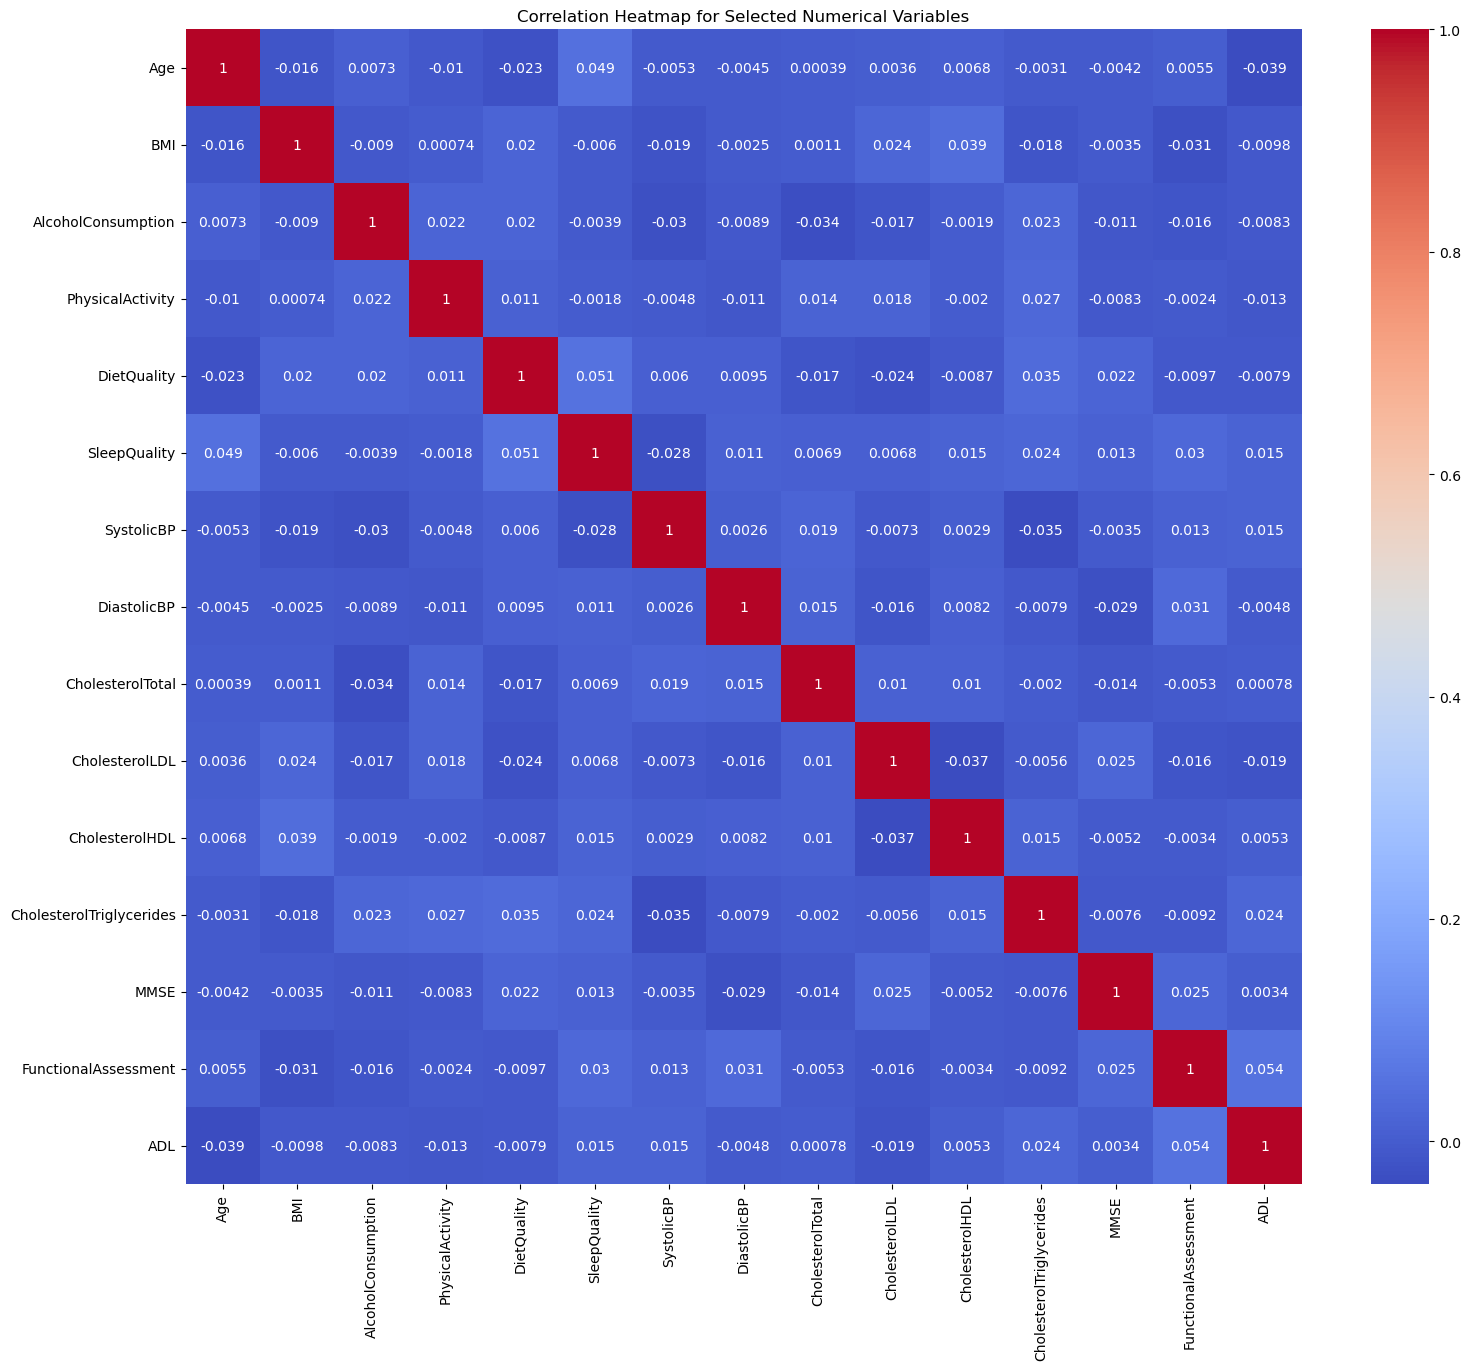

In [108]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

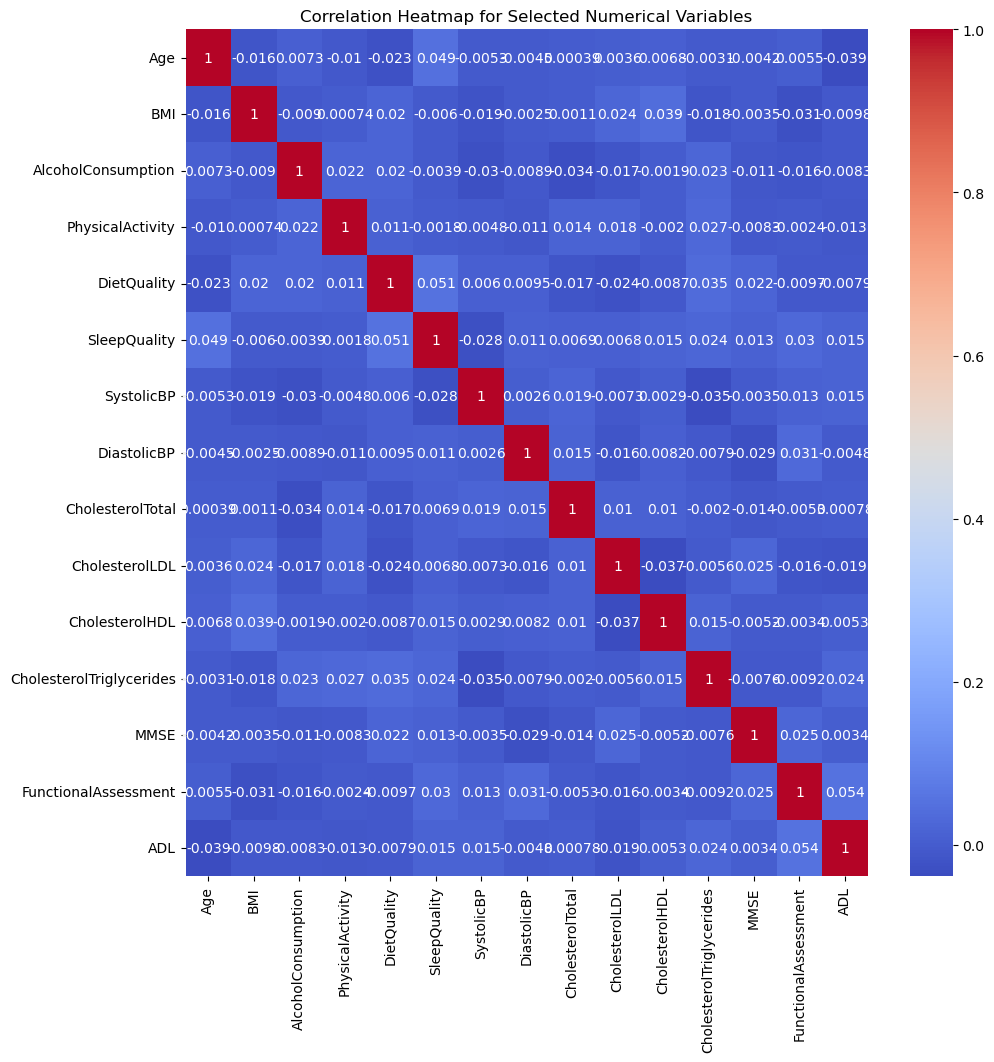

In [111]:

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(11, 11))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show() #filöter for smaller heatmap